# Clustering with DBSCAN on automobile component industry of India  

<b> This project is for the course 'Python Foundation for Spatial Analysis' conducted by Mr.Ujaval Gandhi. Also, my first attempt with Python coding. 

### Objectives: 
* To find out the effective Epsilon parameter of DBSCAN (Knee Point) which is the most important input for DBSCAN.  
            
* To find number of clusters and its plot emerges out of given data using knee point esp value and minimum points. 
            
### About DBSCAN clustring algorithm: 
    
DBSCAN is acronym of Density-Based Spatial Clustering of Application with Noise. Since it is density based clustering, it groups together points that are closely packed together (points with many nearby neighbors), and marks points as outliers if they lie alone in low-density regions. This is an unsupervised machine learning algorithm.
    
DBSCAN has a few parameters and out of them, two are important. First is the epsilon (esp) parameter, and the other one is min_points (min_samples). 
- eps: Two points are considered neighbors if the distance between the two points is below the threshold epsilon 
    
- min_samples: The minimum number of neighbors a given point should have in order to be classified as a core point. The algorithm works by computing the distance between every point and all other points. 

### Results: 
  This excercise of clustering with DBSCAN on automobile component industry of India using following python code resulted into: 
    
- Value of Epsilon parameter (Knee Point) of 63147.03 meters or 63.14 Km distance (See graph of "Knee Point" below)  
- Total number of clusters equal to 11 using esp value 63.14 km and 30 min points.  
         


In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [2]:
#import csv file and print it 
df = pd.read_csv('Reprojected.csv')
print(df)

                 X            Y
0     7.014735e+05  3153084.411
1     6.887634e+05  3139031.086
2     6.586975e+05  3111595.749
3     6.556218e+05  3109667.999
4     7.959888e+05  3318577.894
...            ...          ...
1680  7.903452e+05  3314197.383
1681  8.140278e+05  1406783.909
1682  1.067837e+06  1431471.330
1683  1.068485e+06  1456980.008
1684  7.103473e+05  1218418.515

[1685 rows x 2 columns]


In [3]:
#Converting Pandas data frame to numpy array format 
coords = df.to_numpy()
print (coords)

[[ 701473.516  3153084.411 ]
 [ 688763.4107 3139031.086 ]
 [ 658697.4857 3111595.749 ]
 ...
 [1067836.764  1431471.33  ]
 [1068484.61   1456980.008 ]
 [ 710347.3351 1218418.515 ]]


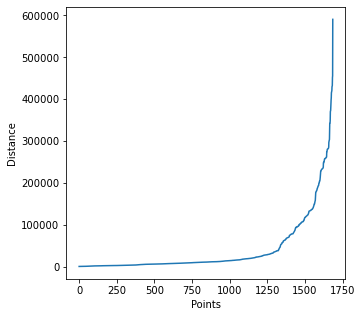

In [9]:
#To compute the nearest neighbours  
nearest_neighbors = NearestNeighbors(n_neighbors=31)
neighbors = nearest_neighbors.fit(coords)
distances, indices = neighbors.kneighbors(coords)

distances = np.sort(distances[:,30], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

plt.savefig("Distance_curve.png", dpi=300)

63147.03648941722


<Figure size 360x360 with 0 Axes>

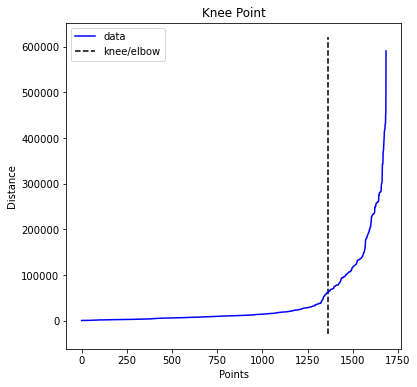

In [10]:
#To find the knee point
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

In [11]:
#DBscan
db = DBSCAN(eps=63147, min_samples=30).fit(coords)
#To print no of clusters
labels = db.labels_
print(type(labels))
print (type(coords))
n_clusters = len(set(labels))
print(n_clusters)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
11


In [13]:
df['C'] = labels 

In [14]:
df.to_csv("Output_Clusters.csv")

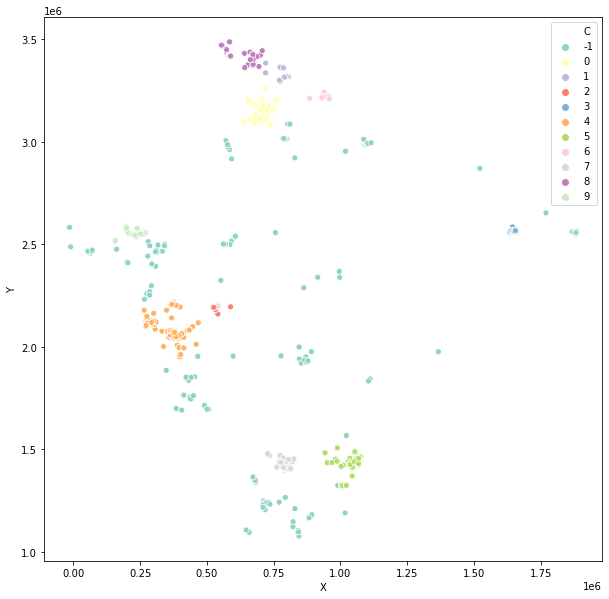

In [19]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(df['X'], df['Y'], hue=df['C'], palette="Set3")